# Introduction to Scikit-learn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn.model_selection import train_test_split

data_raw = pd.read_csv("ROC_data.csv", index_col=0)
data_raw.head()

/home/andy/anaconda3/envs/sklearndev/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,LS_type,DA_area,prob_inh,prob_dyn,slope_tan,elevation,curvature,aspect,wet_index,litho,lulc
3970,8.0,3.0,0.0156,0.000,0.951556,2180.698,4.515543,80.28688,3.450854,5.0,71.0
3971,8.0,3.0,0.0124,0.000,1.093501,2166.145,3.625163,52.44894,3.311813,5.0,71.0
3972,8.0,3.0,0.0222,0.000,0.690770,2140.360,-1.464627,40.48208,4.597811,5.0,71.0
3973,8.0,3.0,0.0304,0.596,0.407125,2127.395,-1.632731,29.35348,5.113264,5.0,31.0
3975,8.0,3.0,0.0222,0.000,0.349647,2114.717,0.455268,51.53106,4.885499,5.0,52.0


In [3]:
data = data_raw.copy()
LS_type_mapping = {8: "No landslides", 1: "Fall/Topple", 2: "Torrent",   3: "Avalanche", 4: "Slump/Creep", 5: "Sackung"}
DA_area_mapping = {1: "runout", 2: "source", 3: "other"}
lithology_mapping = {1: 'Unconsolidated Sediment', 2: 'Ultrabasic rock', 3: 'Weak Metamorphic Foliated',
                     4: 'Sedimentary Rock', 5: 'Hard Metamorphic', 6: 'Intrusive Igneous',
                     7: 'Volcanic/Extrusive Igneous'}
LULC_mapping = {71: "Herbaceous", 52: "Shrubland", 41: "Forest", 31: "Barren",  21: "Developed"}

data['LS_type'] = data_raw.LS_type.map(LS_type_mapping)
data['DA_area'] = data_raw.DA_area.map(DA_area_mapping)
data['litho'] = data_raw.litho.map(lithology_mapping)
data['lulc'] = data_raw.lulc.map(LULC_mapping)

In [4]:
data.head()

,LS_type,DA_area,prob_inh,prob_dyn,slope_tan,elevation,curvature,aspect,wet_index,litho,lulc
3970,No landslides,other,0.0156,0.000,0.951556,2180.698,4.515543,80.28688,3.450854,Hard Metamorphic,Herbaceous
3971,No landslides,other,0.0124,0.000,1.093501,2166.145,3.625163,52.44894,3.311813,Hard Metamorphic,Herbaceous
3972,No landslides,other,0.0222,0.000,0.690770,2140.360,-1.464627,40.48208,4.597811,Hard Metamorphic,Herbaceous
3973,No landslides,other,0.0304,0.596,0.407125,2127.395,-1.632731,29.35348,5.113264,Hard Metamorphic,Barren
3975,No landslides,other,0.0222,0.000,0.349647,2114.717,0.455268,51.53106,4.885499,Hard Metamorphic,Shrubland


In [ ]:
data.shape

In [6]:
data.LS_type.value_counts()

No landslides    2333568
Avalanche          44094
Fall/Topple        30908
Torrent             1721
Slump/Creep          248
Sackung               13
Name: LS_type, dtype: int64

In [22]:
# make sure none of the groups have more than 80,000 samples
# This is a bit of a silly way to subsample the "no landslide" class to make the dataset more managable
data_subsample = data.groupby('LS_type').apply(lambda x: pd.DataFrame.sample(x, min(80000, len(x)))).reset_index(drop=True)

In [23]:
data_subsample.LS_type.value_counts()

No landslides    80000
Avalanche        44094
Fall/Topple      30908
Torrent           1721
Slump/Creep        248
Sackung             13
Name: LS_type, dtype: int64

In [24]:
continuous = data_subsample.dtypes == float
continuous

LS_type      False
DA_area      False
prob_inh      True
prob_dyn      True
slope_tan     True
elevation     True
curvature     True
aspect        True
wet_index     True
litho        False
lulc         False
dtype: bool

Target looks like classification


/home/andy/checkout/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 172 outliers in column prob_inh.
  warn("Dropped {} outliers in column {}.".format(
/home/andy/checkout/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 5 outliers in column wet_index.
  warn("Dropped {} outliers in column {}.".format(
/home/andy/checkout/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 204 outliers in column slope_tan.
  warn("Dropped {} outliers in column {}.".format(
/home/andy/checkout/dabl/dabl/plot/utils.py:628: UserWarning: Dropped 234 outliers in column curvature.
  warn("Dropped {} outliers in column {}.".format(


Linear Discriminant Analysis training set score: 0.249


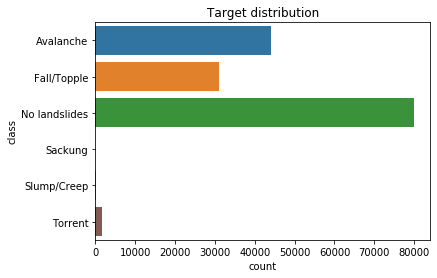

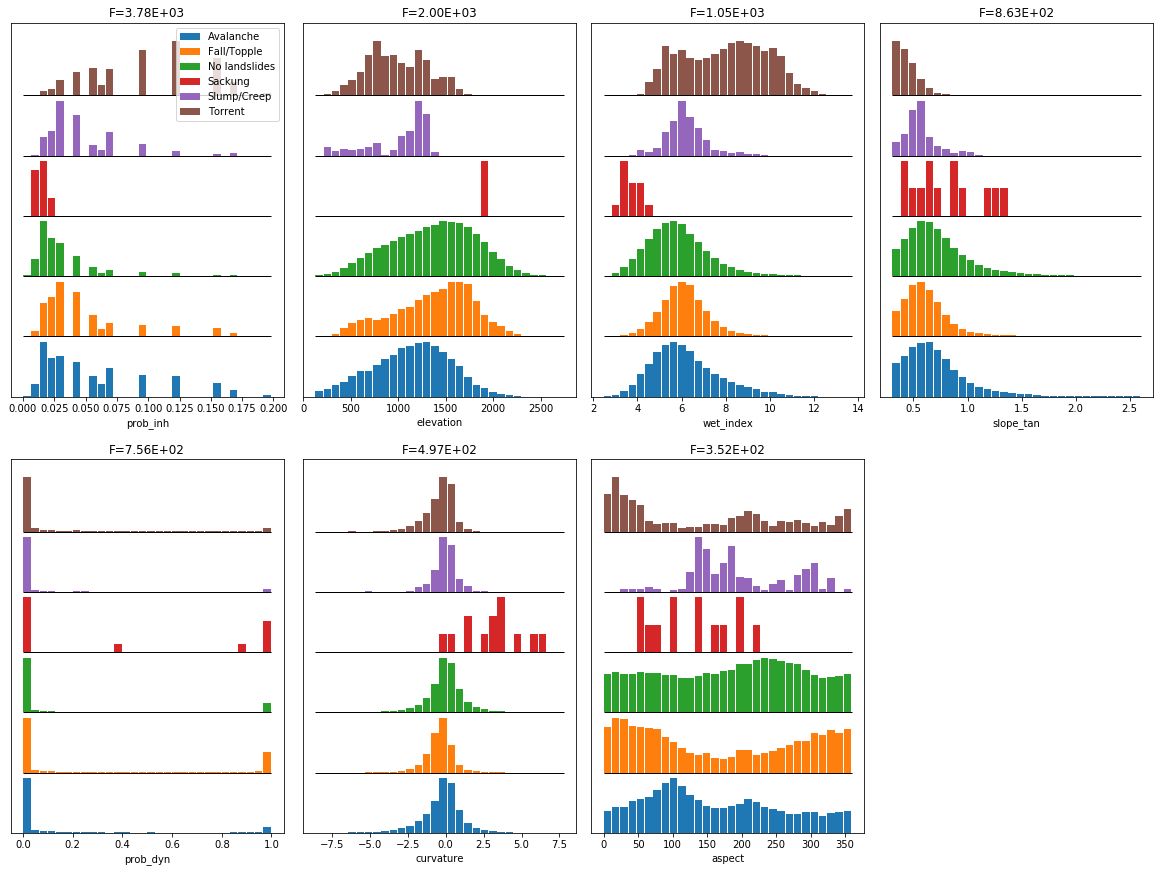

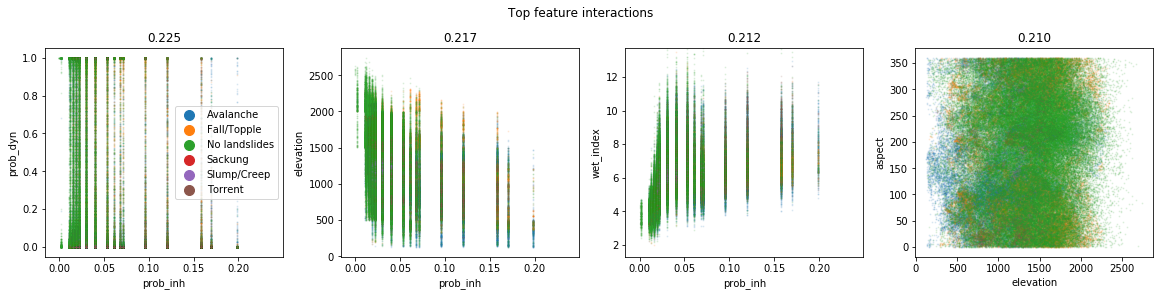

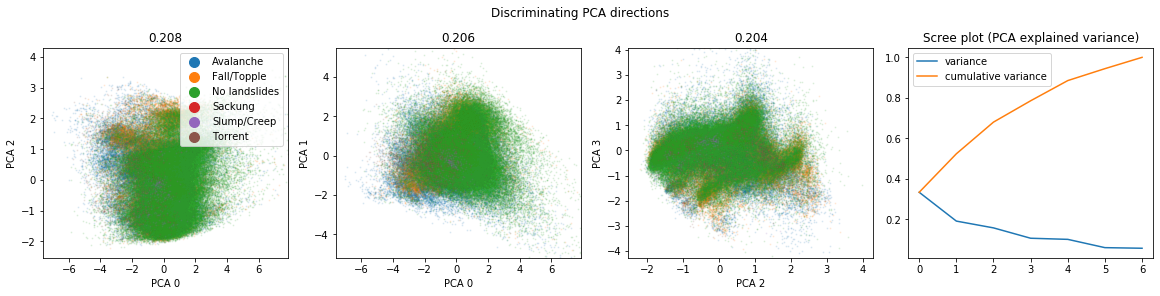

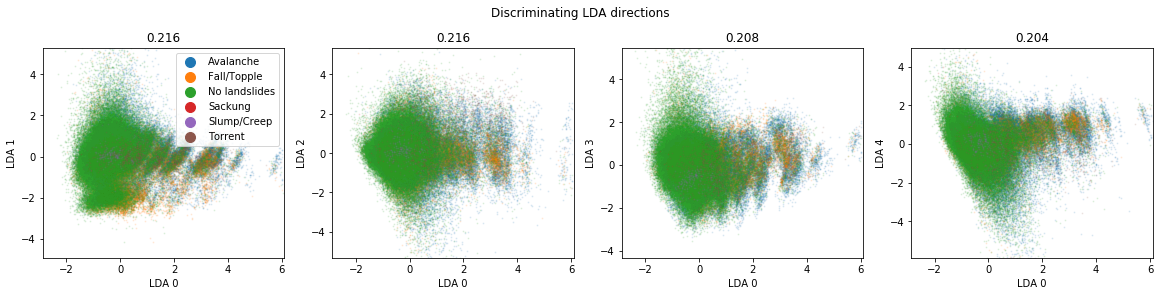

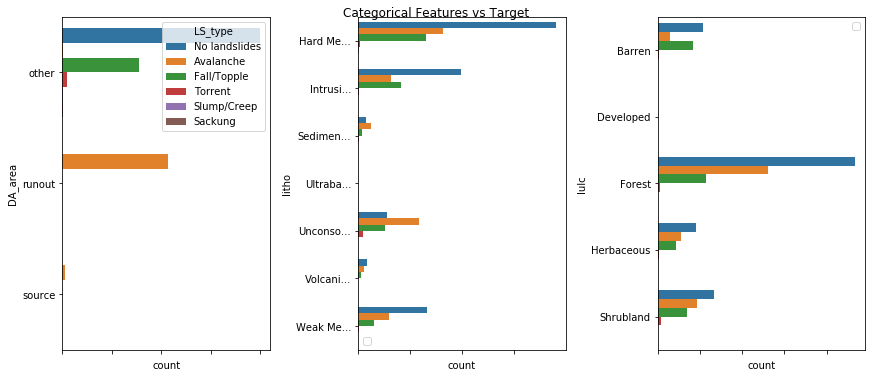

In [32]:
import dabl
dabl.plot(data_subsample, target_col='LS_type')

In [57]:
X = data_subsample.drop('LS_type', axis=1)
y = data_subsample['LS_type']

X_dummy = pd.get_dummies(X)
X_dummy.head()

,prob_inh,prob_dyn,slope_tan,elevation,curvature,aspect,wet_index,DA_area_other,DA_area_runout,DA_area_source,...,litho_Sedimentary Rock,litho_Ultrabasic rock,litho_Unconsolidated Sediment,litho_Volcanic/Extrusive Igneous,litho_Weak Metamorphic Foliated,lulc_Barren,lulc_Developed,lulc_Forest,lulc_Herbaceous,lulc_Shrubland
0,0.0404,0.000,0.798885,1358.152,-2.269816,1.742599,7.765769,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0222,0.112,0.796184,1588.834,0.065592,129.378700,4.799683,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0958,1.000,0.704213,1279.247,-2.341620,168.569400,6.876252,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,0.0304,0.000,0.709319,1230.402,-0.925225,337.333000,5.850917,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0190,0.340,0.524719,1277.311,1.510078,224.765600,4.741370,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_dummy, y, random_state=0)

In [59]:
X_train.shape

(117738, 22)

In [60]:
y_train.value_counts()

No landslides    59785
Avalanche        33215
Fall/Topple      23285
Torrent           1273
Slump/Creep        171
Sackung              9
Name: LS_type, dtype: int64

In [63]:
pd.Series(y_train).value_counts(normalize=True)

No landslides    0.507780
Avalanche        0.282109
Fall/Topple      0.197770
Torrent          0.010812
Slump/Creep      0.001452
Sackung          0.000076
Name: LS_type, dtype: float64

Really Simple API
-------------------
0) Import your model class

In [64]:
from sklearn.linear_model import LogisticRegression

1) Instantiate an object and set the parameters

In [67]:
logreg = LogisticRegression(max_iter=1000)

2) Fit the model

In [68]:
logreg.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

3) Apply / evaluate

In [69]:
print(logreg.predict(X_train[:10]))

['No landslides' 'No landslides' 'Avalanche' 'Fall/Topple' 'No landslides'
 'No landslides' 'No landslides' 'No landslides' 'No landslides'
 'Avalanche']


In [70]:
logreg.score(X_train, y_train)

0.7952742530024292

In [71]:
logreg.score(X_test, y_test)

0.7934566580033634

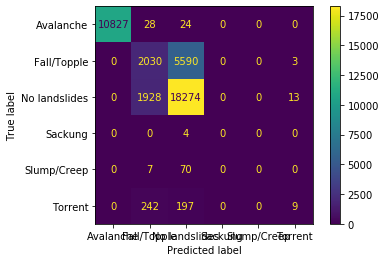

In [72]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)

And again
---------

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier()

In [76]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
rf.score(X_train, y_train)

1.0

In [78]:
rf.score(X_test, y_test)

0.865897161494165

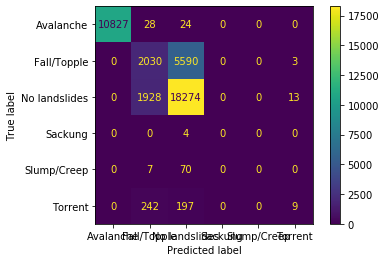

In [79]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)